loaded 271 objects
loaded 227 actions


<ipython-input-4-838bf026556a>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-838bf026556a>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-838bf026556a>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-838bf026556a>:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-838bf026556a>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-838bf026556a>:63: UserWarning: Matplotlib is cur

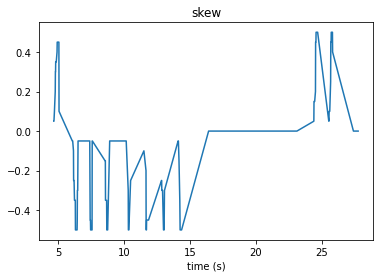

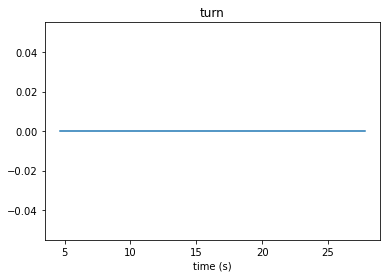

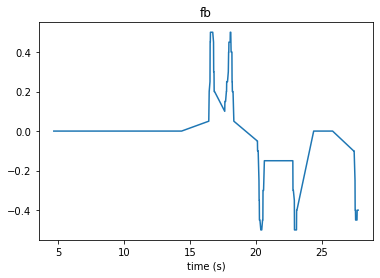

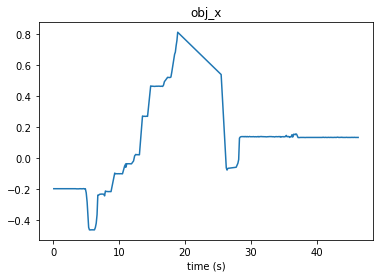

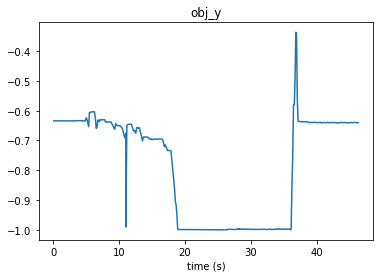

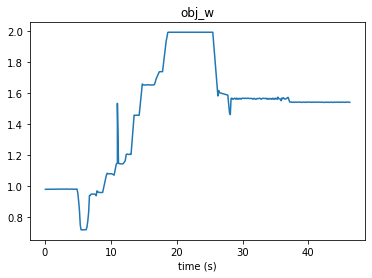

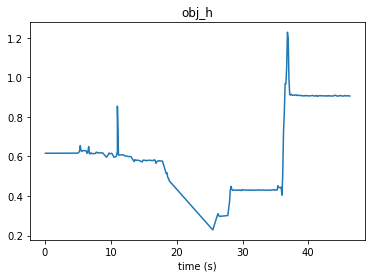

In [4]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

data_loc="../logs/"
action_file=data_loc+"learn_and_track_action_log_20201207-164930.txt"
object_file=data_loc+"learn_and_track_object_log_20201207-164930.txt"

object_target="stop_sign"

def load_file(obj_logfile,act_logfile):
    object_time=[]
    object_pos=[]
    action_time=[]
    action=[]
    with open(act_logfile) as f:
        reader=csv.reader(f,delimiter=' ')
        for row in reader:
            action_time.append(float(row[0]))
            action.append( [ float(row[1]),float(row[2]),float(row[3])])        
    f.close()   
    with open(obj_logfile) as f:
        reader=csv.reader(f,delimiter=' ')
        for row in reader:
            if row[1]!=object_target:
                continue
            object_time.append(float(row[0]))
            #x y w h
            object_pos.append( [ (float(row[3])-320)/320,(float(row[4])-240)/240,float(row[5])/320,float(row[6])/240])        
    f.close()   
    object_time=np.array(object_time)
    object_pos=np.array(object_pos)
    action_time=np.array(action_time)
    action=np.array(action)
    print("loaded {} objects".format(len(object_time)))
    print("loaded {} actions".format(len(action_time)))
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='skew')
    ax.plot(action_time,action[:,1])
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='turn')
    ax.plot(action_time,action[:,2])
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='fb')
    ax.plot(action_time,action[:,0])
    fig.show()   
    
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='obj_x')
    ax.plot(object_time,object_pos[:,0])
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='obj_y')
    ax.plot(object_time,object_pos[:,1])
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='obj_w')
    ax.plot(object_time,object_pos[:,2])
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='time (s)', ylabel='',title='obj_h')
    ax.plot(object_time,object_pos[:,3])
    fig.show()
    
    return [object_time,object_pos,action_time,action]
data_raw=load_file(object_file,action_file)

<ipython-input-12-b1a65c110595>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-b1a65c110595>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-b1a65c110595>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


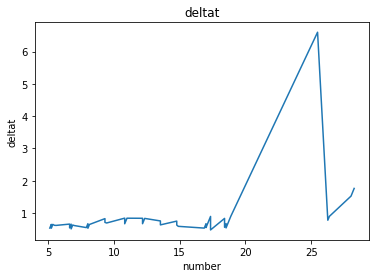

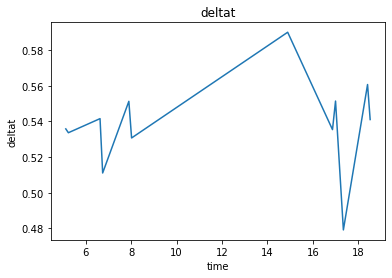

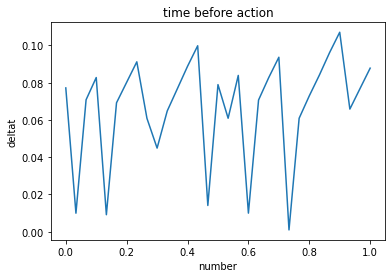

In [12]:
def scour_data(data_raw):
    object_time,object_pos,action_time,action=data_raw
    delay_time=0.45
    max_delay=0.6
    before_index=np.searchsorted(object_time,action_time)-1
    after_index=np.searchsorted(object_time,action_time+delay_time)
    #this is to handle off-end problems    
    object_time_2=np.append(object_time,object_time[-1])
    delta_t=object_time_2[after_index]-object_time_2[before_index]    
    fig, ax = plt.subplots()
    ax.set(xlabel='number', ylabel='deltat',title='deltat')
    ax.plot(object_time_2[after_index],delta_t)
    fig.show()
    usable_indices=(delta_t<max_delay)&(delta_t>delay_time)    
    before_time_indices=before_index[usable_indices]
    after_time_indices=after_index[usable_indices]    
    
    cut_before_state=object_pos[before_time_indices]
    cut_after_state=object_pos[after_time_indices]
    cut_action=action[usable_indices]
    cut_action_time=action_time[usable_indices]
    delta_t=delta_t[usable_indices]
    fig, ax = plt.subplots()
    ax.set(xlabel='time', ylabel='deltat',title='deltat')
    ax.plot(object_time_2[after_index][usable_indices],delta_t)
    fig.show()
    fig, ax = plt.subplots()
    ax.set(xlabel='number', ylabel='deltat',title='time before action')
    ax.plot(np.linspace(0,1,len(delta_t)),cut_action_time-object_time[before_time_indices])
    fig.show()
    return cut_before_state,cut_after_state,cut_action
    
cut_before_state,cut_after_state,cut_action=scour_data(data_raw)

<ipython-input-13-b8a495f31f85>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-13-b8a495f31f85>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-13-b8a495f31f85>:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-13-b8a495f31f85>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-13-b8a495f31f85>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


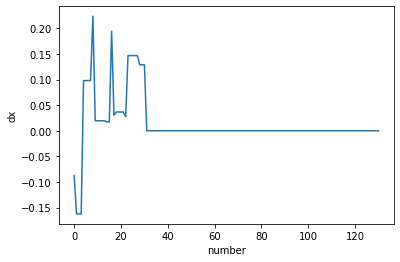

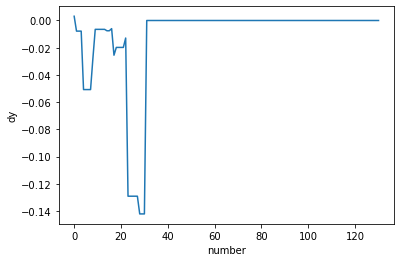

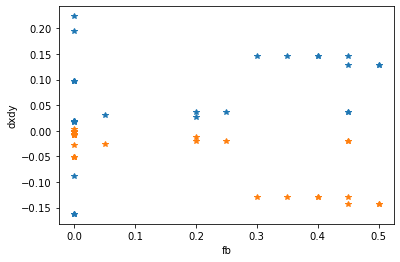

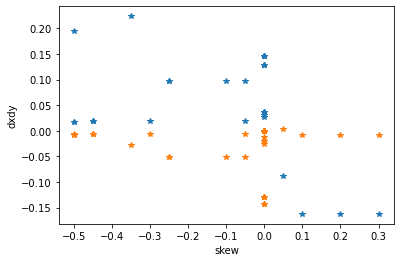

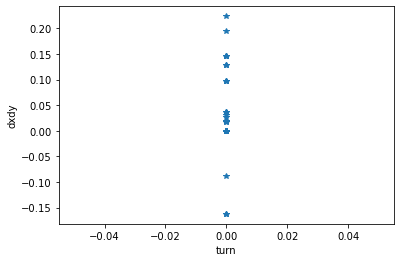

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import csv
import random
import numpy as np
  
def build_training_set_bmpred(state_before,state_after,action):    
    training_x=[]
    training_y=[]    
    for b,a,act in zip(state_before,state_after,action):
        if np.abs(a[0]-b[0])<1.0 and np.abs(a[1]-b[1])<1.0:
            training_x.append(torch.tensor( [b[0],b[1],act[0],act[1],act[2]]))
            training_y.append(torch.tensor( [a[0]-b[0],a[1]-b[1]]))            
    #add an array of noaction giving zero
    for myb in np.linspace(-1,1,10):
        for mym in np.linspace(-1,1,10):
            training_x.append(torch.tensor([ myb,mym,0,0,0]))
            training_y.append(torch.tensor([0,0]))
    return torch.stack(training_x).float(),torch.stack(training_y).float()

training_x,training_y=build_training_set_bmpred(cut_before_state,cut_after_state,cut_action)

fig, ax = plt.subplots()
ax.set(xlabel='number', ylabel='dx',title='')
ax.plot(np.arange(len(training_y)),training_y[:,0])
fig.show()

fig, ax = plt.subplots()
ax.set(xlabel='number', ylabel='dy',title='')
ax.plot(np.arange(len(training_y)),training_y[:,1])
fig.show()

fig, ax = plt.subplots()
ax.set(xlabel='fb', ylabel='dxdy',title='')
ax.plot(training_x[:,2],training_y,'*')
fig.show()

fig, ax = plt.subplots()
ax.set(xlabel='skew', ylabel='dxdy',title='')
ax.plot(training_x[:,3],training_y,'*')
fig.show()
fig, ax = plt.subplots()
ax.set(xlabel='turn', ylabel='dxdy',title='')
ax.plot(training_x[:,4],training_y[:,0],'*')
fig.show()